In [41]:
from collections import defaultdict

import matplotlib.pyplot as plt
from keras import models, layers
from keras.utils import to_categorical
from nltk.corpus import names
from nltk.stem import WordNetLemmatizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow import keras

groups = fetch_20newsgroups()

In [73]:
data_train = fetch_20newsgroups(subset='train', random_state=21)
train_labels = data_train.target
data_test = fetch_20newsgroups(subset='test', random_state=21)
test_labels = data_test.target
len(data_train.data), len(data_test.data), len(test_labels)

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [15]:
all_names = names.words()
WNL = WordNetLemmatizer()


def clean(data):
    cleaned = defaultdict(list)
    count = 0
    for group in data:
        for words in group.split():
            if words.isalpha() and words not in all_names:
                cleaned[count].append(WNL.lemmatize(words.lower()))
        cleaned[count] = ' '.join(cleaned[count])
        count += 1
    return (list(cleaned.values()))

In [16]:
x_train = clean(data_train.data)
x_test = clean(data_test.data)

In [38]:
tf = TfidfVectorizer(stop_words='english', max_features=1000)
X_train = tf.fit_transform(x_train)
X_train = X_train.astype("float32")
X_test = tf.transform(x_test)
X_test = X_test.astype("float32")
X_train.shape, X_test.shape

((11314, 1000), (7532, 1000))

In [33]:
train_labels_oneHot = to_categorical(train_labels)
test_labels_oneHot = to_categorical(test_labels)

In [88]:
def compile_train_plot_conf(network, train_x, train_y, test_x, test_y, batch_size=128):
    network.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    history = network.fit(x=train_x,
                          y=train_y,
                          epochs=20,
                          batch_size=batch_size,
                          validation_data=(test_x, test_y),
                          workers=-1)
    print(history.history.keys())

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # ConfusionMatrix
    # from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    # import numpy as np
    # from matplotlib.pyplot import figure
    # y_prediction = network.predict(test_x)
    # y_prediction = np.argmax(y_prediction, axis=1)
    # test_y = np.argmax(test_y, axis=1)
    # Create confusion matrix and normalizes it over predicted (columns)
    # cm = confusion_matrix(test_y, y_prediction, normalize='pred')
    # print(cm)
    # figure(figsize=(240, 240), dpi=80)
    # disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=groups.target_names)
    # disp.plot(cmap=plt.cm.Blues)
    # plt.savefig(f"{network}.png")
    # plt.show()



# Testing different NN architectures

Epoch 1/2
89/89 [==============================] - 2s 12ms/step - loss: 2.4530 - accuracy: 0.5250 - val_loss: 1.7798 - val_accuracy: 0.6121
Epoch 2/2
89/89 [==============================] - 1s 10ms/step - loss: 1.1864 - accuracy: 0.7358 - val_loss: 1.2299 - val_accuracy: 0.6426
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


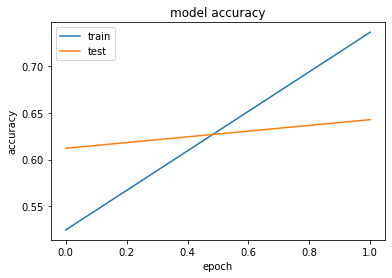

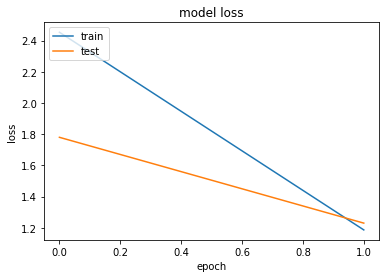

236/236 [==============================] - 0s 2ms/step
[[0.60504202 0.00672646 0.00255102 0.00240385 0.00292398 0.00275482
  0.00884956 0.00308642 0.0212766  0.02416357 0.         0.00307692
  0.0044843  0.02850356 0.01152738 0.13690476 0.01382488 0.03293413
  0.02553191 0.14634146]
 [0.         0.51569507 0.08673469 0.02884615 0.04093567 0.09366391
  0.01106195 0.00308642 0.00945626 0.01672862 0.00288184 0.00615385
  0.0470852  0.02137767 0.02017291 0.00793651 0.         0.
  0.         0.0097561 ]
 [0.         0.0941704  0.54336735 0.07692308 0.03508772 0.12947658
  0.00884956 0.01851852 0.00945626 0.01115242 0.00288184 0.00307692
  0.01345291 0.02375297 0.00864553 0.00396825 0.         0.
  0.00851064 0.01463415]
 [0.         0.04484305 0.07908163 0.53125    0.15789474 0.01652893
  0.03982301 0.00617284 0.00472813 0.00929368 0.         0.
  0.06278027 0.0023753  0.         0.         0.         0.00598802
  0.00425532 0.00487805]
 [0.00420168 0.02690583 0.06122449 0.15865385 0.57602

In [89]:
network_1 = models.Sequential()
network_1.add(layers.Dense(512, activation='relu', input_shape=(1000,)))
network_1.add(layers.Dense(20, activation='softmax'))

compile_train_plot_conf(network=network_1, train_x=X_train, train_y=train_labels_oneHot, test_x=X_test,
                        test_y=test_labels_oneHot)

Epoch 1/20
23/23 [==============================] - 3s 94ms/step - loss: 2.9830 - accuracy: 0.0713 - val_loss: 2.9038 - val_accuracy: 0.4020
Epoch 2/20
23/23 [==============================] - 2s 85ms/step - loss: 2.8513 - accuracy: 0.1620 - val_loss: 2.7002 - val_accuracy: 0.5009
Epoch 3/20
23/23 [==============================] - 2s 81ms/step - loss: 2.5463 - accuracy: 0.2815 - val_loss: 2.1111 - val_accuracy: 0.5422
Epoch 4/20
23/23 [==============================] - 2s 92ms/step - loss: 2.0346 - accuracy: 0.3939 - val_loss: 1.5767 - val_accuracy: 0.5913
Epoch 5/20
23/23 [==============================] - 2s 88ms/step - loss: 1.6448 - accuracy: 0.4895 - val_loss: 1.3471 - val_accuracy: 0.6160
Epoch 6/20
23/23 [==============================] - 2s 85ms/step - loss: 1.4099 - accuracy: 0.5643 - val_loss: 1.2431 - val_accuracy: 0.6345
Epoch 7/20
23/23 [==============================] - 2s 87ms/step - loss: 1.2533 - accuracy: 0.6028 - val_loss: 1.1826 - val_accuracy: 0.6409
Epoch 8/20
23

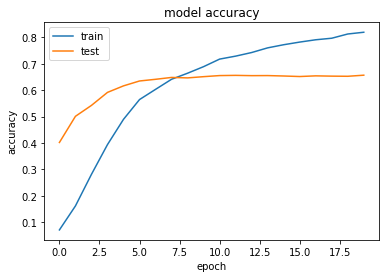

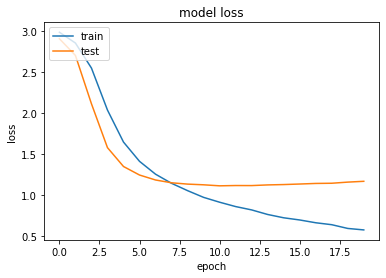

In [65]:
network_2 = models.Sequential()
network_2.add(
    layers.Dense(1000, kernel_initializer=keras.initializers.he_normal(seed=1), activation='relu', input_shape=(1000,)))
network_2.add(layers.Dropout(0.81))
network_2.add(layers.Dense(1000, kernel_initializer=keras.initializers.he_normal(seed=2), activation='relu'))
network_2.add(layers.Dropout(0.81))
network_2.add(layers.Dense(20, kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=4),
                           activation='softmax'))

compile_train_plot_conf(network=network_2, train_x=X_train, train_y=train_labels_oneHot, test_x=X_test,
                       test_y=test_labels_oneHot, batch_size=512)

Epoch 1/20
89/89 [==============================] - 5s 42ms/step - loss: 3.0276 - accuracy: 0.0585 - val_loss: 2.9823 - val_accuracy: 0.1316
Epoch 2/20
89/89 [==============================] - 4s 39ms/step - loss: 2.9858 - accuracy: 0.0701 - val_loss: 2.9610 - val_accuracy: 0.2808
Epoch 3/20
89/89 [==============================] - 4s 40ms/step - loss: 2.9008 - accuracy: 0.1017 - val_loss: 2.6704 - val_accuracy: 0.2601
Epoch 4/20
89/89 [==============================] - 3s 37ms/step - loss: 2.5194 - accuracy: 0.1874 - val_loss: 2.1336 - val_accuracy: 0.3713
Epoch 5/20
89/89 [==============================] - 3s 39ms/step - loss: 2.1481 - accuracy: 0.2801 - val_loss: 1.8006 - val_accuracy: 0.4559
Epoch 6/20
89/89 [==============================] - 3s 36ms/step - loss: 1.8507 - accuracy: 0.3690 - val_loss: 1.5678 - val_accuracy: 0.5304
Epoch 7/20
89/89 [==============================] - 4s 40ms/step - loss: 1.6285 - accuracy: 0.4350 - val_loss: 1.4523 - val_accuracy: 0.5443
Epoch 8/20
89

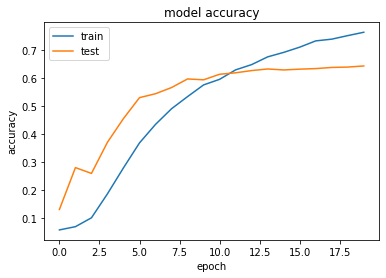

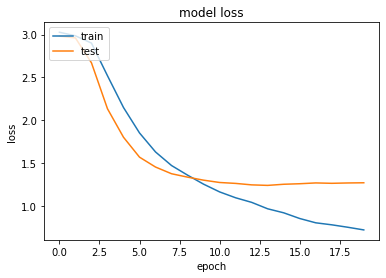

In [66]:
network_3 = models.Sequential()
network_3.add(
    layers.Dense(1000, kernel_initializer=keras.initializers.he_normal(seed=1), activation='relu', input_shape=(1000,)))
network_3.add(layers.Dropout(0.81))
network_3.add(layers.Dense(1000, kernel_initializer=keras.initializers.he_normal(seed=2), activation='relu'))
network_3.add(layers.Dropout(0.81))
network_3.add(layers.Dense(500, kernel_initializer=keras.initializers.he_normal(seed=3), activation='relu'))
network_3.add(layers.Dropout(0.81))
network_3.add(layers.Dense(20, kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=4),
                           activation='softmax'))

compile_train_plot_conf(network=network_3, train_x=X_train, train_y=train_labels_oneHot, test_x=X_test,
                       test_y=test_labels_oneHot)